In [1]:
#importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from tqdm import tqdm

from scipy import ndimage as ndi

from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte


### 2)

In [3]:
img1 = cv2.imread('fingerprint3.png',0)
img2 = cv2.imread('fingerprint4.png',0)
img1.shape, img2.shape

((512, 512), (512, 512))

In [4]:
_, img1_bin = cv2.threshold(img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_, img2_bin = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


#### a) Erosion and Dilation

####  fingerprint3

In [7]:
kernel = np.ones((5,5))
#erosion
erosion1 = cv2.erode(img1_bin,kernel,iterations = 1)
#dilation
dilation1 = cv2.dilate(img1_bin,kernel,iterations = 1)

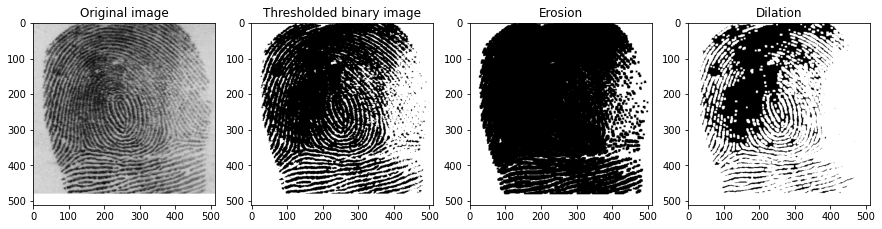

In [9]:
fig, axs = plt.subplots(1,4, figsize = (15,6))
axs[0].imshow(img1, cmap ='gray')
axs[0].set_title("Original image")

axs[1].imshow(img1_bin, cmap = 'gray')
axs[1].set_title("Thresholded binary image")

axs[2].imshow(erosion1, cmap = 'gray')
axs[2].set_title("Erosion")

axs[3].imshow(dilation1, cmap = 'gray')
axs[3].set_title("Dilation")

plt.show()

#### fingerprint4

In [10]:
kernel = np.ones((5,5))
#erosion
erosion2 = cv2.erode(img2_bin,kernel,iterations = 1)
#dilation
dilation2 = cv2.dilate(img2_bin,kernel,iterations = 1)

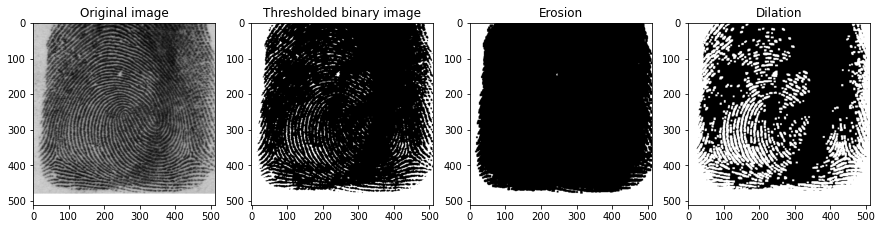

In [11]:
fig, axs = plt.subplots(1,4, figsize = (15,6))
axs[0].imshow(img2, cmap ='gray')
axs[0].set_title("Original image")

axs[1].imshow(img2_bin, cmap = 'gray')
axs[1].set_title("Thresholded binary image")

axs[2].imshow(erosion2,  cmap = 'gray')
axs[2].set_title("Erosion")

axs[3].imshow(dilation2,  cmap = 'gray')
axs[3].set_title("Dilation")

plt.show()

#### b) Opening and closing 

**Round Kernel**

In [20]:
img = cv2.imread('fingerprint5.png',0)
_, img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [21]:
img_complement = 255 - img
_, img_complement_bin = cv2.threshold(img_complement,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [22]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
opening = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)

In [23]:
opening_complement = cv2.morphologyEx(img_complement_bin, cv2.MORPH_OPEN, kernel)
closing_complement = cv2.morphologyEx(img_complement_bin, cv2.MORPH_CLOSE, kernel)

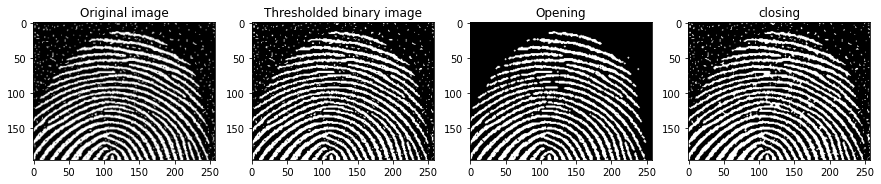

In [24]:
fig, axs = plt.subplots(1,4, figsize = (15,6))

axs[0].imshow(img, cmap ='gray')
axs[0].set_title("Original image")

axs[1].imshow(img_bin, cmap = 'gray')
axs[1].set_title("Thresholded binary image")

axs[2].imshow(opening,  cmap = 'gray')
axs[2].set_title("Opening")

axs[3].imshow(closing,  cmap = 'gray')
axs[3].set_title("closing")

plt.show()

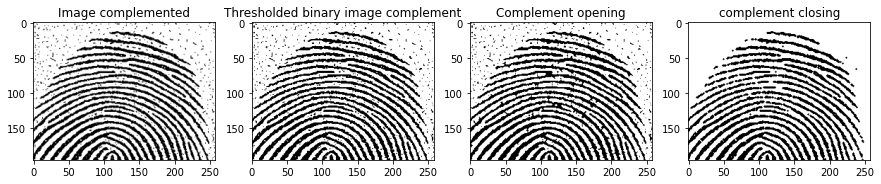

In [25]:
fig, axs = plt.subplots(1,4, figsize = (15,6))

axs[0].imshow(img_complement, cmap ='gray')
axs[0].set_title("Image complemented")

axs[1].imshow(img_complement_bin, cmap = 'gray')
axs[1].set_title("Thresholded binary image complement")

axs[2].imshow(opening_complement,  cmap = 'gray')
axs[2].set_title("Complement opening")

axs[3].imshow(closing_complement,  cmap = 'gray')
axs[3].set_title("complement closing")

plt.show()

**Box Kernel**

In [26]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
opening = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)

In [27]:
opening_complement = cv2.morphologyEx(img_complement_bin, cv2.MORPH_OPEN, kernel)
closing_complement = cv2.morphologyEx(img_complement_bin, cv2.MORPH_CLOSE, kernel)

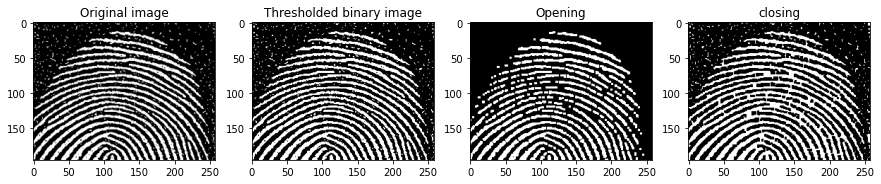

In [28]:
fig, axs = plt.subplots(1,4, figsize = (15,6))

axs[0].imshow(img, cmap ='gray')
axs[0].set_title("Original image")

axs[1].imshow(img_bin, cmap = 'gray')
axs[1].set_title("Thresholded binary image")

axs[2].imshow(opening,  cmap = 'gray')
axs[2].set_title("Opening")

axs[3].imshow(closing,  cmap = 'gray')
axs[3].set_title("closing")

plt.show()

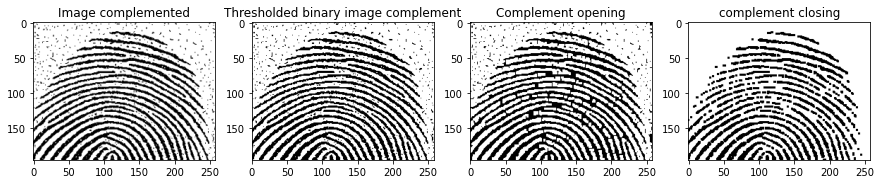

In [29]:
fig, axs = plt.subplots(1,4, figsize = (15,6))

axs[0].imshow(img_complement, cmap ='gray')
axs[0].set_title("Image complemented")

axs[1].imshow(img_complement_bin, cmap = 'gray')
axs[1].set_title("Thresholded binary image complement")

axs[2].imshow(opening_complement,  cmap = 'gray')
axs[2].set_title("Complement opening")

axs[3].imshow(closing_complement,  cmap = 'gray')
axs[3].set_title("complement closing")

plt.show()

#### c) K-means clustering

#### market

In [36]:
img = cv2.imread('market.jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
Ks = [2,3,4,5,7,8,10,11,12,15,20]
segmented_images = {}

for K in Ks:
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    segmented_images[K] = res2


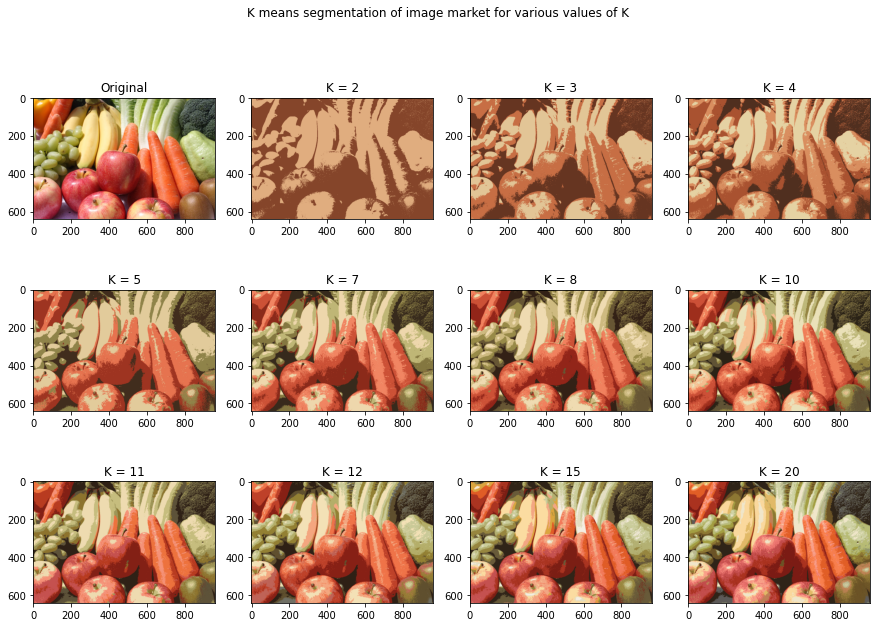

In [39]:
fig, axs = plt.subplots(3,4, figsize = (15,10))

axs[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0,0].set_title("Original")

i = 0
j = 1
for K in Ks:
    segmented = segmented_images[K]
    axs[i,j].imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    axs[i,j].set_title("K = {}".format(K))
    j+=1
    if j==4:
        i+=1
        j=0

plt.suptitle("K means segmentation of image market for various values of K")
plt.show()

#### Pisa

In [40]:
img = cv2.imread('Pisa.jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
Ks = [2,3,4,5,7,8,10,11,12,15,20]
segmented_images = {}

for K in Ks:
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    segmented_images[K] = res2


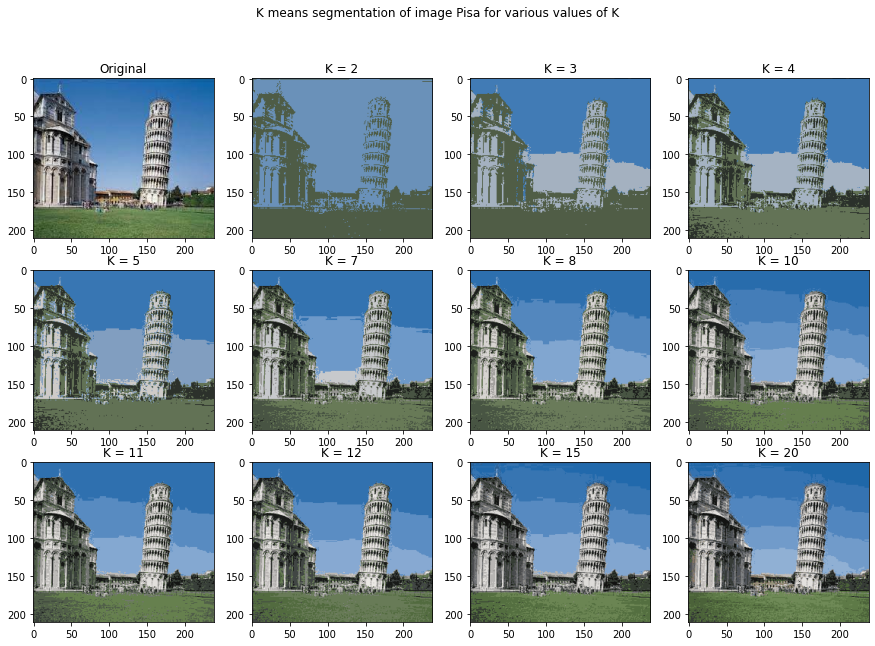

In [42]:
fig, axs = plt.subplots(3,4, figsize = (15,10))

axs[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0,0].set_title("Original")

i = 0
j = 1
for K in Ks:
    segmented = segmented_images[K]
    axs[i,j].imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    axs[i,j].set_title("K = {}".format(K))
    j+=1
    if j==4:
        i+=1
        j=0

plt.suptitle("K means segmentation of image Pisa for various values of K")
plt.show()

Yes, increasing the value of bins help in better segmentation. This is because if we consider more bins, more colors will be considered and hence, the resultant segmented image will be closer and closer to the original image.

### d) Superpixel algorithm

#### pandas

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]c:\users\dbang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  if __name__ == '__main__':
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.53s/it]


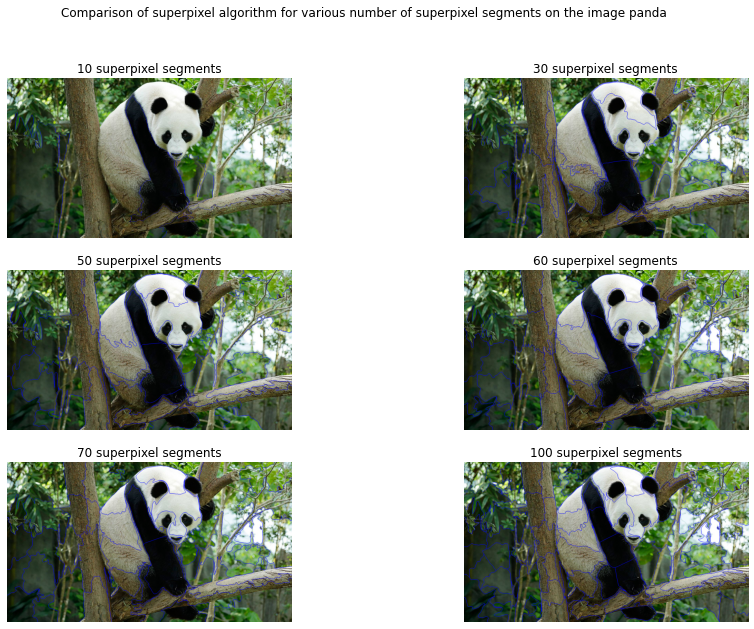

In [4]:
number_superpixels = [10,30,50, 60, 70, 100]
image = img_as_float(io.imread('panda.jpeg'))

fig, axs = plt.subplots(int(len(number_superpixels)/2), 2, figsize = (15, 10))
# loop over the number of segments
i = 0
j = 0
for numSegments in tqdm(number_superpixels):
    segments = slic(image, n_segments = numSegments, sigma = 5)
    
    axs[i,j].imshow(mark_boundaries(image, segments, color = (0,0,255)))
    axs[i,j].set_title("{} superpixel segments".format(numSegments))
    axs[i,j].axis('off')
    
    j+=1
    if j==2:
        i+=1
        j=0
        
plt.suptitle("Comparison of superpixel algorithm for various number of superpixel segments on the image panda")

plt.show()
    

For each choice of number of superpixel segments, I am plotting the margin of the segments in the image itself by a blue color. From the plots we see that after about 50 superpixel segments, the segmentation gives an idea of the image without losing meaning. However, the more superpixels we consider the more details we get. For example, when we consider 60 superpixel segments the ears of the panda are also segmented out separately from the face whereas that is not present for 50 superpixel segments.

#### pisa

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]c:\users\dbang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  if __name__ == '__main__':
100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.70it/s]


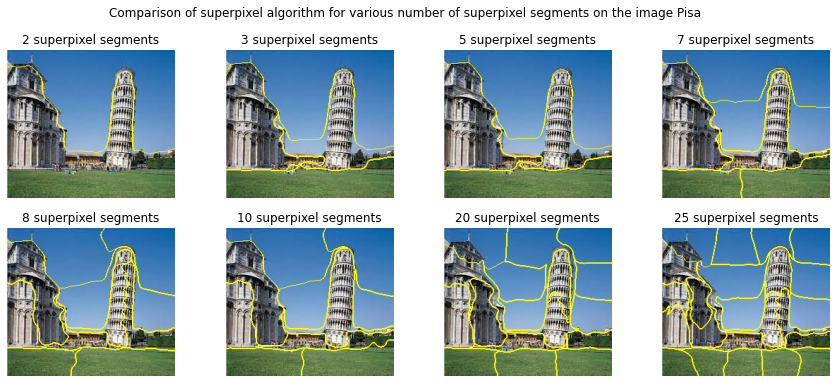

In [8]:
number_superpixels = [2, 3, 5, 7, 8, 10, 20, 25]
image = img_as_float(io.imread('Pisa.jpg'))
ncol = int(len(number_superpixels)/2)
fig, axs = plt.subplots(2,ncol, figsize = (15, 6))
# loop over the number of segments
i = 0
j = 0
for numSegments in tqdm(number_superpixels):
    segments = slic(image, n_segments = numSegments, sigma = 5)
    
    axs[i,j].imshow(mark_boundaries(image, segments))
    axs[i,j].set_title("{} superpixel segments".format(numSegments))
    axs[i,j].axis('off')
    
    j+=1
    if j==ncol:
        i+=1
        j=0
        
plt.suptitle("Comparison of superpixel algorithm for various number of superpixel segments on the image Pisa")

plt.show()
    

From the images we can see that after about 5 superpixel segments the idea of the image is evident from the segmentation. However, the more superpixels we consider the more segments are considered and for 7 superpixel segments we get a very good segmentation of the image.


### e) Watershed algorithm

**Reference**: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_marked_watershed.html

#### market

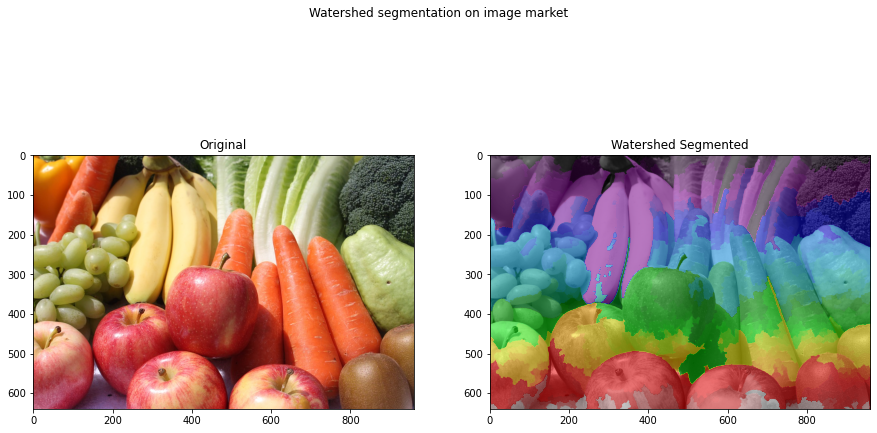

In [55]:

original = cv2.imread('market.jpg')
image = img_as_ubyte(cv2.cvtColor(original, cv2.COLOR_BGR2GRAY))

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axs = plt.subplots(1,2, figsize = (15,8))


axs[0].imshow(cv2.cvtColor(original,cv2.COLOR_BGR2RGB))
axs[0].set_title("Original")


axs[1].imshow(image, cmap=plt.cm.gray)
axs[1].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
axs[1].set_title("Watershed Segmented")

plt.suptitle("Watershed segmentation on image market")
plt.show()

#### Colors.png

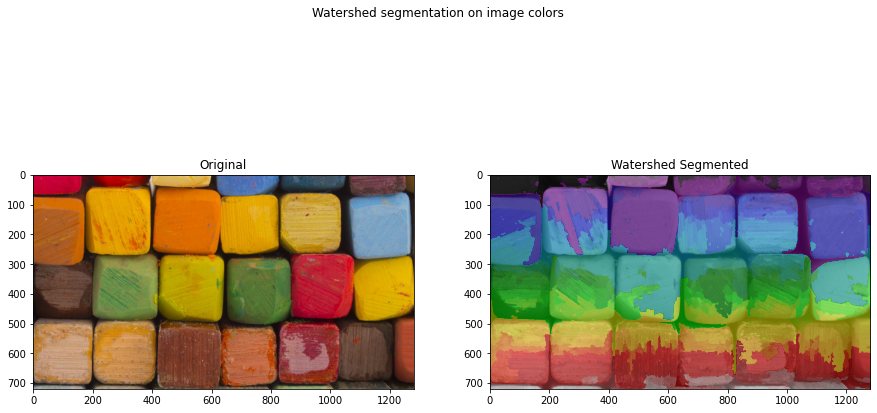

In [56]:
original = cv2.imread('Colors.png')
image = img_as_ubyte(cv2.cvtColor(original, cv2.COLOR_BGR2GRAY))

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axs = plt.subplots(1,2, figsize = (15,8))


axs[0].imshow(cv2.cvtColor(original,cv2.COLOR_BGR2RGB))
axs[0].set_title("Original")


axs[1].imshow(image, cmap=plt.cm.gray)
axs[1].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
axs[1].set_title("Watershed Segmented")

plt.suptitle("Watershed segmentation on image colors")
plt.show()

### 3) SIFT

In [3]:
def sift(img1, img2, number_of_matches = 50):
    #img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    #sift
    sift = cv2.xfeatures2d.SIFT_create()

    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

    #feature matching
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:number_of_matches], img2, flags=2)

    return img3

In [4]:
img1 = cv2.imread('hawamahal1.jpg')
img2 = cv2.imread('hawamahal2.jpg')

In [5]:
matched80 = sift(img1, img2, number_of_matches = 80)

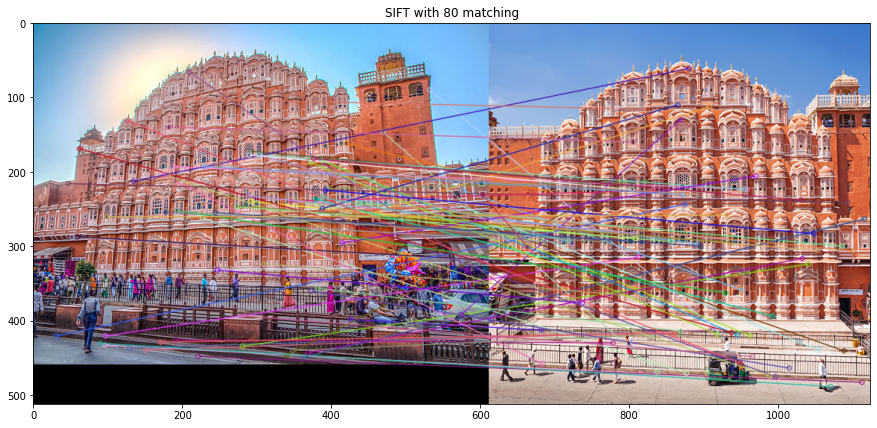

In [6]:
fig = plt.figure(figsize = (15,10))
plt.imshow(cv2.cvtColor(matched80,cv2.COLOR_BGR2RGB))
plt.title("SIFT with 80 matching")
plt.show()